In [45]:
from hydra import initialize, compose
import json
from rdkit import Chem
from rdkit.Chem import AllChem
from pathlib import Path
from ergochem.draw import draw_reaction, draw_molecule
from IPython.display import SVG
import pandas as pd
import ast

In [46]:
with initialize(version_base=None, config_path="./conf/filepaths"):
    filepaths = compose(config_name="filepaths")

In [47]:
entries = {}
for i in range(0, 11):
    with open(Path(filepaths.raw_mcsa) / f"entries_{i}.json", "r") as f:
        entries = {**entries, **json.load(f)}

In [48]:
mech_df = pd.read_csv(Path(filepaths.processed_data) / 'mcsa' / 'mech_labeled_reactions.csv', sep=",")
mech_df['mech_atoms'] = mech_df['mech_atoms'].apply(lambda x: ast.literal_eval(x))
mech_df.head()

,entry_id,mechanism_id,smarts,mech_atoms
0,43,1,[OH-:73].[O:2]([P:3]([O-:4])(=[O:5])[O-:6])[*:...,"[[73], [2, 3, 4, 6]]"


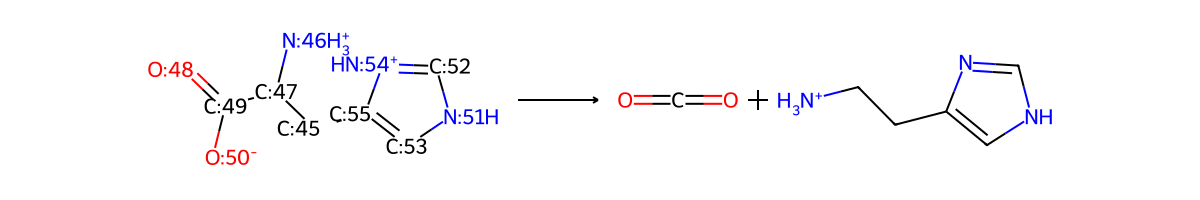

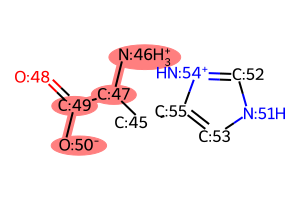

In [42]:
def display_mech_labeled_rxn(entry_id: int):
    sma2mol = lambda x : Chem.MolFromSmiles(Chem.MolToSmiles(Chem.MolFromSmarts(x)))
    mech_atom_map_nums = mech_df.loc[mech_df['entry_id'] == entry_id, 'mech_atoms'].iloc[0]
    smarts = mech_df.loc[mech_df['entry_id'] == entry_id, 'smarts'].iloc[0]
    lhs = [sma2mol(elt) for elt in smarts.split('>>')[0].split('.')]

    # Get atoms involved in the reaction
    involved_atoms = []
    for ams, mol in zip(mech_atom_map_nums, lhs):
        involved_atoms.append([atom.GetIdx() for atom in mol.GetAtoms() if atom.GetAtomMapNum() in ams])
    
    # Display
    display(SVG(draw_reaction(smarts)))
    for i, rct in enumerate(lhs):
        display(SVG(draw_molecule(rct, size=(300, 200), highlight_atoms=involved_atoms[i], draw_options={"addAtomIndices": False})))


display_mech_labeled_rxn(49)

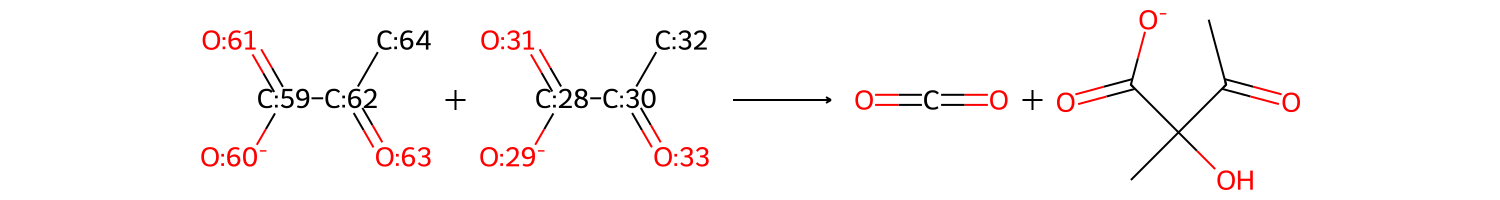

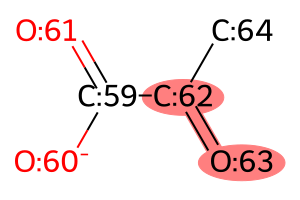

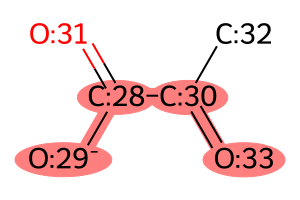

In [44]:
display_mech_labeled_rxn(722)

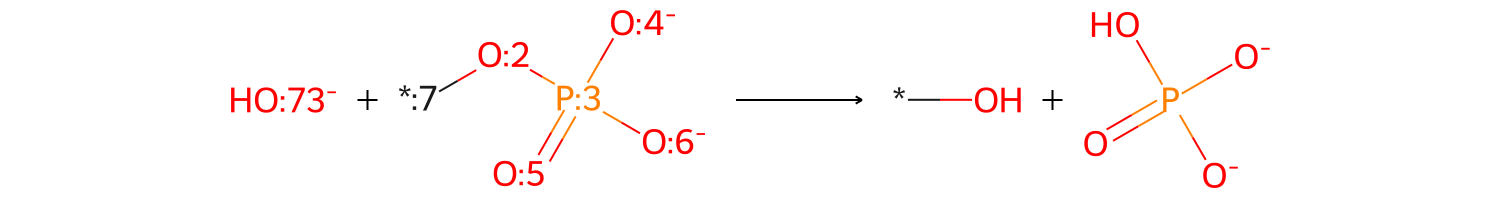

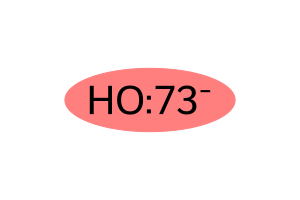

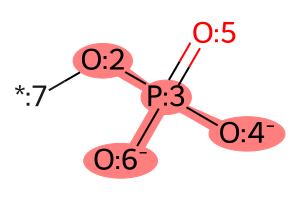

In [49]:
display_mech_labeled_rxn(43)

Whittled down dative cycle issue

In [35]:
rule = '[Mg+2:1]1<-[#8-:21]-[#6H2:23]-[#6:25]-[#8-:26]->1>>[Mg+2:1]1<-[#8-:21]-[#6-:23]-[#6:25]-[#8-:26]->1'
rct_sma = '[Mg+2:1]1<-[#8-:21]-[#6H2:23]-[#6:25]-[#8-:26]->1'
rct = Chem.MolFromSmarts(rct_sma)
Chem.SanitizeMol(rct)
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=False)
rxn.RunReactants([rct])

()

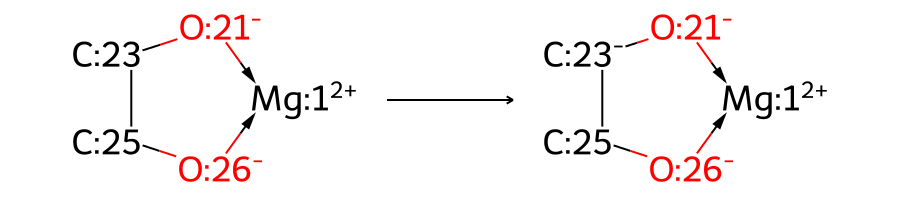

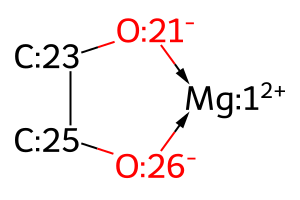

In [36]:
display(SVG(draw_reaction(rule)))
display(SVG(draw_molecule(rct, size=(300, 200))))

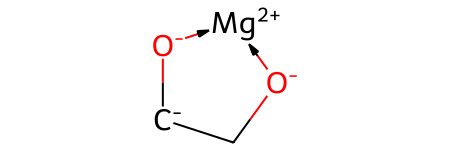

In [37]:
rule = '[#8-:26]1->[Mg+2:1]<-[#8-:21]-[#6H2:23]-[#6:25]-1>>[#8-:26]1->[Mg+2:1]<-[#8-:21]-[#6-:23]-[#6:25]-1'
rct_sma = '[#8-:26]1->[Mg+2:1]<-[#8-:21]-[#6H2:23]-[#6:25]-1'
rct = Chem.MolFromSmarts(rct_sma)
Chem.SanitizeMol(rct)
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=False)
rxn.RunReactants([rct])[0][0]

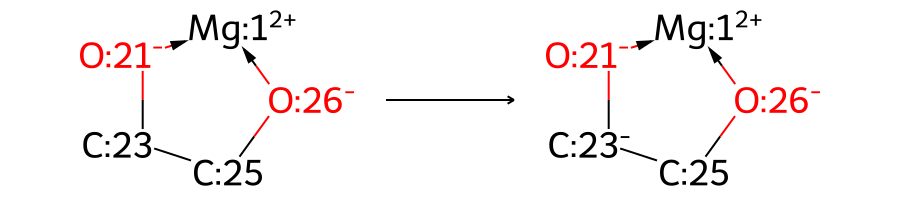

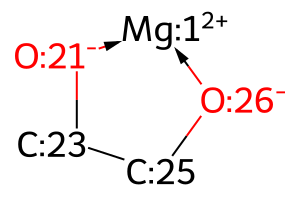

In [38]:
display(SVG(draw_reaction(rule)))
display(SVG(draw_molecule(rct, size=(300, 200))))

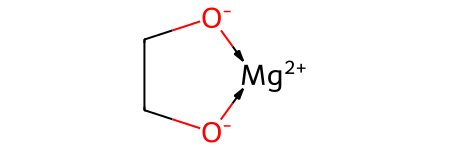

In [39]:
rule = '[Mg+2:1]1<-[#8-:21]-[#6H2:23]-[#6:25]-[#8-:26]->1>>[Mg+2:1]1<-[#8-:21]-[#6-:23]-[#6:25]-[#8-:26]->1'
rct_sma = '[Mg+2:1]1<-[#8-:21]-[#6H2:23]-[#6:25]-[#8-:26]->1'
rct = Chem.MolFromSmarts(rct_sma)
Chem.SanitizeMol(rct)
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=True)
rxn.RunReactants([rct])[0][0]